<a href="https://colab.research.google.com/github/RonChits/Default-Probability/blob/main/Default_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data importing.

>Modules to be used.

In [4]:
import pandas as pd
import numpy as np
import re
import nest_asyncio
import xgboost
# import uvicorn
# import category_encoders as ce
# import seaborn as sns
# import nominatim
import geopy
import string
import pickle
import requests
import matplotlib.pyplot as plt
import seaborn as sns

import imblearn
# sampling techniques.
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# classifiers.
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# transformers.
from sklearn.preprocessing import StandardScaler,  OneHotEncoder, LabelEncoder, FunctionTransformer

# metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, ConfusionMatrixDisplay,precision_score, f1_score, roc_curve , auc, confusion_matrix
from sklearn.pipeline import Pipeline, make_pipeline

#http communications.
# from fastapi import FastAPI , Body, HTTPException, Request, status
# from fastapi.encoders import jsonable_encoder
# from fastapi.exceptions import RequestValidationError
# from fastapi.responses import JSONResponse

# extras.
import plotly.express as px
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from pydantic import BaseModel
from tabulate import tabulate
import dill
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, BatchNormalization

### Assigning to dataframe csv to df.

---

In [5]:
df = pd.read_csv("data_science_competition_2024.csv", index_col=0)

---
>Gaining a basic understanding of the structure and content of our dataframe, which is essential for further data exploration and analysis.

In [6]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_id               100000 non-null  object 
 1   gender                100000 non-null  object 
 2   disbursemet_date      100000 non-null  object 
 3   currency              100000 non-null  object 
 4   country               99900 non-null   object 
 5   sex                   100000 non-null  object 
 6   is_employed           100000 non-null  bool   
 7   job                   95864 non-null   object 
 8   location              99405 non-null   object 
 9   loan_amount           100000 non-null  float64
 10  number_of_defaults    100000 non-null  int64  
 11  outstanding_balance   100000 non-null  float64
 12  interest_rate         100000 non-null  float64
 13  age                   100000 non-null  int64  
 14  number_of_defaults.1  100000 non-null  int64  
 15  remain

(100000, 20)

>

---
>Gaining a basic understanding of the structure and content of our dataframe, which is essential for further data exploration and analysis.

In [7]:
df.head(5)

,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status
0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,female,2022 10 29,USD,Zimbabwe,female,True,Teacher,Beitbridge,39000.0,0,48653.011473,0.22,37,0,47,3230.038869,married,37,Did not default
1,368bf756-fcf2-4822-9612-f445d90b485b,other,2020 06 06,USD,Zimbabwe,other,True,Teacher,Harare,27000.0,2,28752.062237,0.20,43,2,62,3194.139103,single,43,Did not default
2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,other,2023 09 29,USD,Zimbabwe,other,True,Nurse,Gweru,35000.0,1,44797.554126,0.22,43,1,57,3330.826656,married,43,Did not default
3,191c62f8-2211-49fe-ba91-43556b307871,female,2022 06 22,USD,Zimbabwe,female,True,Doctor,Rusape,24000.0,0,35681.496413,0.23,47,0,42,2246.797020,divorced,47,Did not default
4,477cd8a1-3b01-4623-9318-8cd6122a8346,male,2023 02 08,USD,Zimbabwe,male,True,Nurse,Chipinge,19000.0,0,34156.055882,0.20,42,0,45,2310.858441,married,42,Did not default


#### Cleaning of the data with aspects observed(a comprehensive/shorter way).



> Summarry of data Cleaning of dataframe of loans

In [ ]:
# Summarry of data Cleaning of dataframe of loans
def wrangle(df):
    def clean_currency(value):
        return re.sub(r'\$', '', value)
    def empty_strings(series):
        return series.replace(r'^\s*$', 'other', regex = True)

    df['currency'] = df['currency'].astype(str)
    df['marital_status'] = df['marital_status'].astype(str)
        #cleaning dollar sign on currency
    df['currency'] = df['currency'].apply(clean_currency)

        #cleaning empty strings on marital status
    df['marital_status'] = empty_strings(df['marital_status'])
        # Droping the duplicates rowwise
    df=df.drop_duplicates()

        #Droping null values
    df=df.dropna(how='any')


    df= df.rename(columns={"remaining term" : "remaining_term"})
    df= df.rename(columns={"Loan Status" : "Loan_Status"})

        # Using Pandas to change their datatypes
    df['disbursemet_date'] = pd.to_datetime(df['disbursemet_date'],
                                              format ='%Y %m %d')
    df['remaining_term']= pd.to_numeric(df['remaining_term'], errors= 'coerce')

        #removing outliers
        # remaining term
    df = df[df["remaining_term"]<80]


        # outlier ...interest rate--
    i1, i9 = df["interest_rate"].quantile([0.01, 0.99])
    mask = df["interest_rate"].between(i1, i9)
    df = df[mask]

        # outlier ...loan amount--
        #l1, l9 = df["loan_amount"].quantile([0.05, 0.95])
        #mask2 = df["loan_amount"].between(l1, l9)
        #df = df[mask2]

        # outlier ...outstanding balance--
        #o1, o9 = df["outstanding_balance"].quantile([0.05, 0.95])
        #mask3 = df["outstanding_balance"].between(o1, o9)
        #df = df[mask3]

        # outlier ...age--
        #a1, a9 = df["age"].quantile([0.05, 0.95])
        #mask4 = df["age"].between(a1, a9)
        #df = df[mask4]

        #lets drop the columns that are duplicated
        #Droping sex , number_of_defaults.1 and age.1
    columns_to_drop =['sex', 'number_of_defaults.1', 'age.1']
    df =df.drop(columns_to_drop, axis=1)

    return df

With wrangle function im cleaning the df at once with observed issues on data exploration.

In [ ]:
df = wrangle(df)

# EDA

> More information about df.

In [8]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_id               100000 non-null  object 
 1   gender                100000 non-null  object 
 2   disbursemet_date      100000 non-null  object 
 3   currency              100000 non-null  object 
 4   country               99900 non-null   object 
 5   sex                   100000 non-null  object 
 6   is_employed           100000 non-null  bool   
 7   job                   95864 non-null   object 
 8   location              99405 non-null   object 
 9   loan_amount           100000 non-null  float64
 10  number_of_defaults    100000 non-null  int64  
 11  outstanding_balance   100000 non-null  float64
 12  interest_rate         100000 non-null  float64
 13  age                   100000 non-null  int64  
 14  number_of_defaults.1  100000 non-null  int64  
 15  remain

(100000, 20)

In [9]:
df.describe()

,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,salary,age.1
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000
mean,31120.000000,0.441970,36964.909763,0.210435,43.57069,0.441970,2781.804324,43.57069
std,15895.093631,0.688286,10014.758477,0.018725,4.86376,0.688286,696.450055,4.86376
min,1000.000000,0.000000,0.000000,0.100000,21.00000,0.000000,250.000000,21.00000
25%,21000.000000,0.000000,29625.227472,0.200000,40.00000,0.000000,2273.929349,40.00000
50%,31000.000000,0.000000,35063.852394,0.210000,44.00000,0.000000,2665.441567,44.00000
75%,40000.000000,1.000000,42133.388817,0.220000,47.00000,1.000000,3146.577655,47.00000
max,273000.000000,2.000000,150960.000000,0.300000,65.00000,2.000000,10000.000000,65.00000




> Quick overview of the central tendency (mean, median), spread (standard deviation), and range (min, max) of our numerical data.


> understanding the distribution of our data, whether it's skewed, normally distributed.

 >Understanding the characteristics of our numerical features.



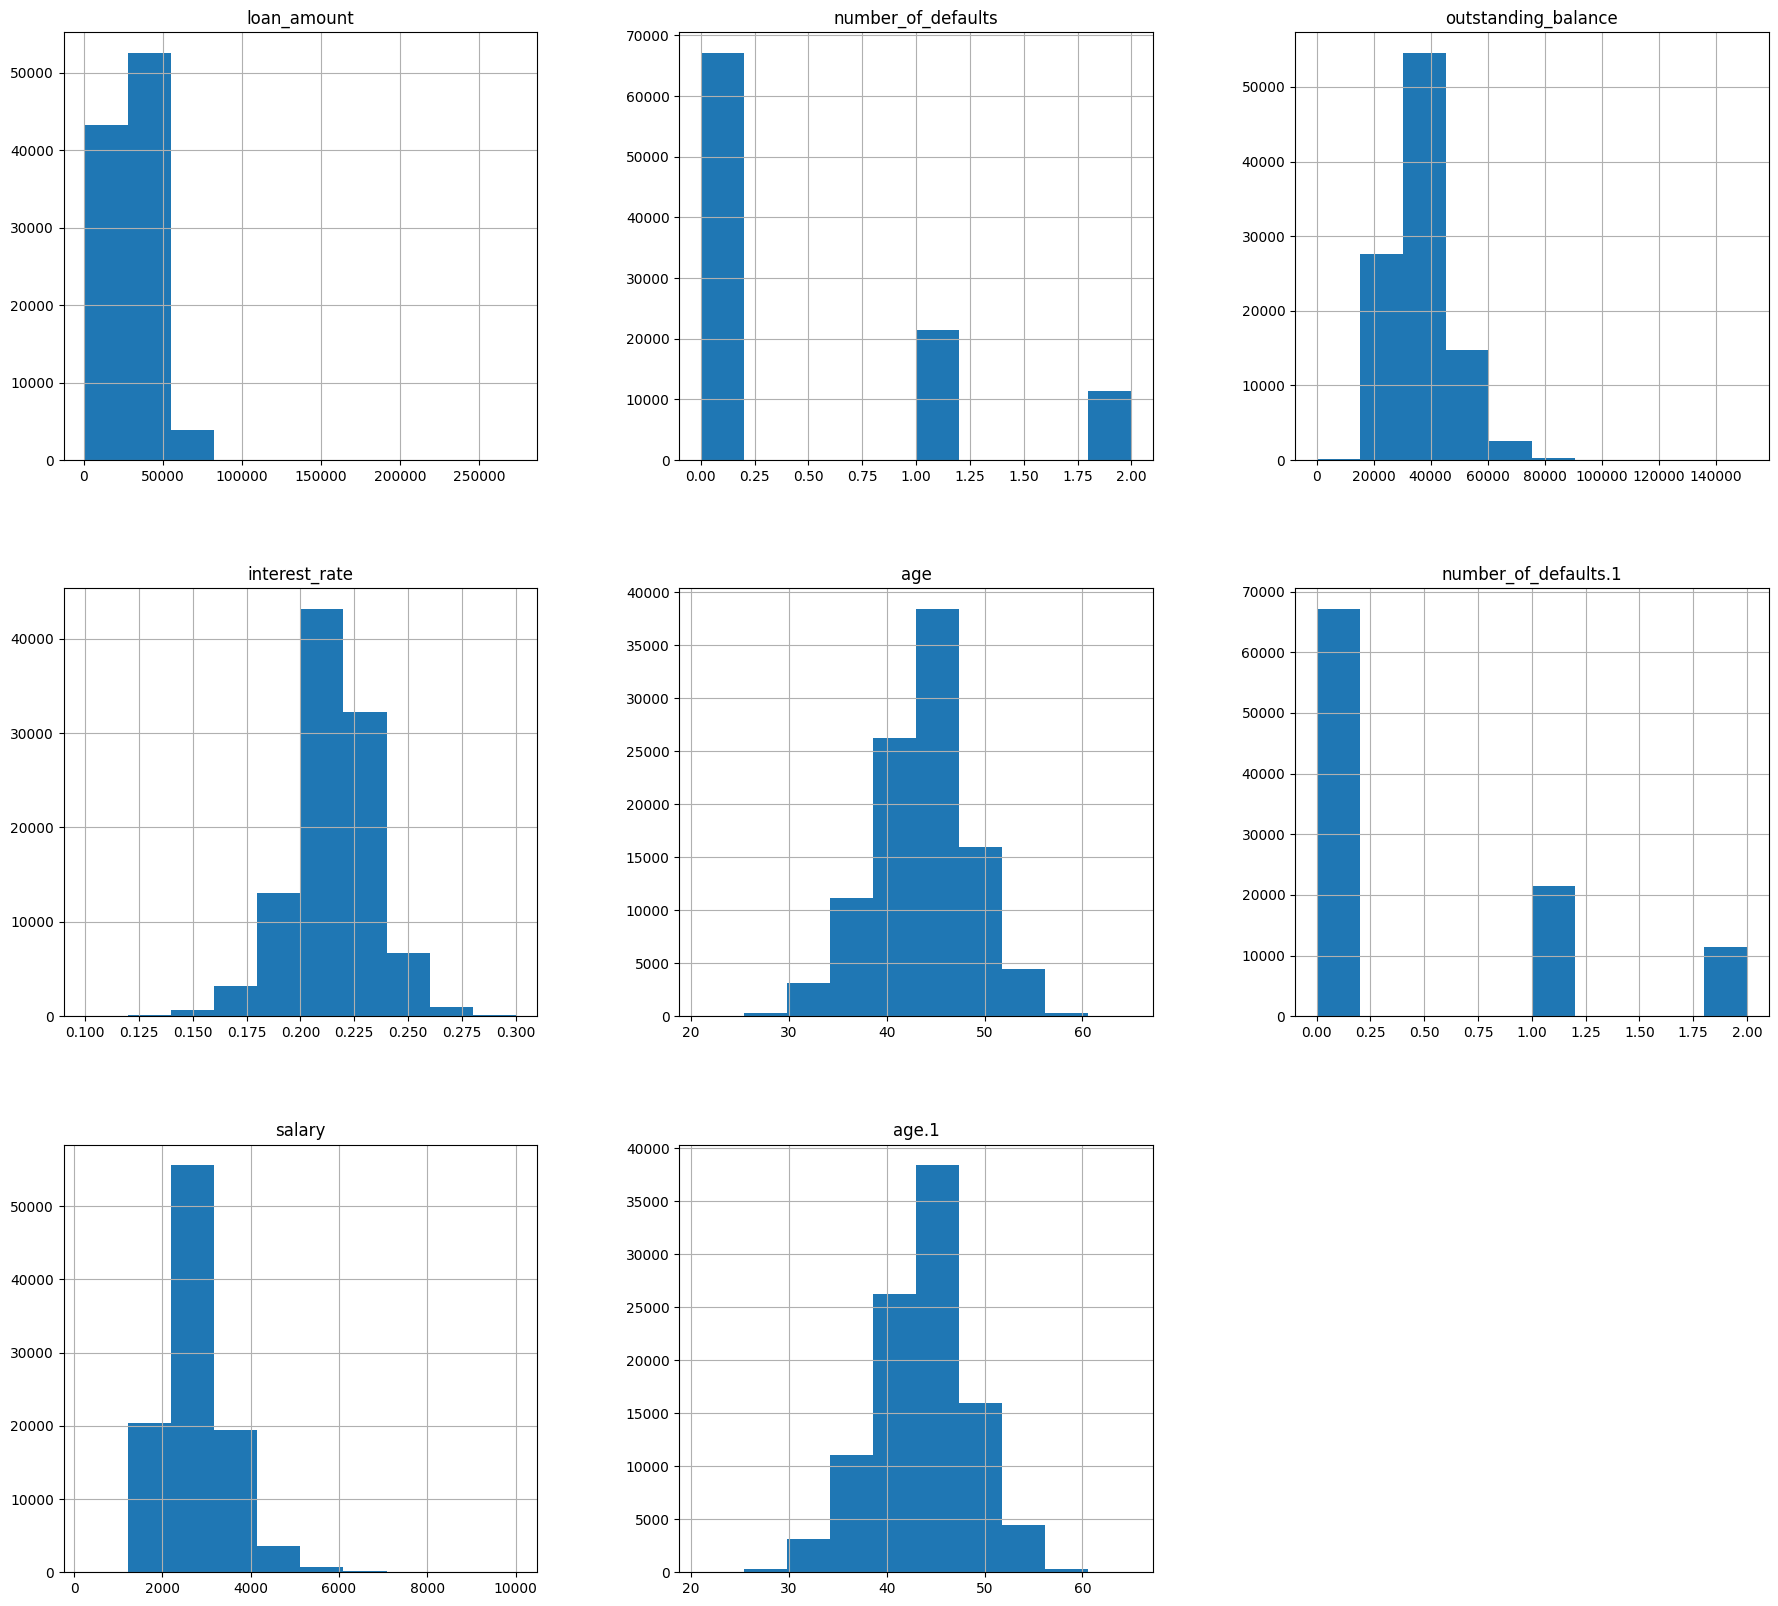

In [10]:
df.hist(figsize=(22,20))
plt.show()


> Checking for missing values in our dataframe.



In [12]:
df.isnull().sum()

loan_id                    0
gender                     0
disbursemet_date           0
currency                   0
country                  100
sex                        0
is_employed                0
job                     4136
location                 595
loan_amount                0
number_of_defaults         0
outstanding_balance        0
interest_rate              0
age                        0
number_of_defaults.1       0
remaining term             0
salary                     0
marital_status             0
age.1                      0
Loan Status                0
dtype: int64

In [14]:
#Target feature
df['Loan Status'].value_counts()

Loan Status
Did not default    85134
Defaulted          14866
Name: count, dtype: int64

> Checking the balance on Loan status.

>The imbalance is observed here , as the defaults and non-default are proportionaly have big difference which leads to model predicting better on non defaults but missing a lot on defaults(minority bias).

>First 5 entries.

In [15]:
df.head(5)

,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status
0,8d05de78-ff32-46b1-aeb5-b3190f9c158a,female,2022 10 29,USD,Zimbabwe,female,True,Teacher,Beitbridge,39000.0,0,48653.011473,0.22,37,0,47,3230.038869,married,37,Did not default
1,368bf756-fcf2-4822-9612-f445d90b485b,other,2020 06 06,USD,Zimbabwe,other,True,Teacher,Harare,27000.0,2,28752.062237,0.20,43,2,62,3194.139103,single,43,Did not default
2,6e3be39e-49b5-45b5-aab6-c6556de53c6f,other,2023 09 29,USD,Zimbabwe,other,True,Nurse,Gweru,35000.0,1,44797.554126,0.22,43,1,57,3330.826656,married,43,Did not default
3,191c62f8-2211-49fe-ba91-43556b307871,female,2022 06 22,USD,Zimbabwe,female,True,Doctor,Rusape,24000.0,0,35681.496413,0.23,47,0,42,2246.797020,divorced,47,Did not default
4,477cd8a1-3b01-4623-9318-8cd6122a8346,male,2023 02 08,USD,Zimbabwe,male,True,Nurse,Chipinge,19000.0,0,34156.055882,0.20,42,0,45,2310.858441,married,42,Did not default


> Checking if we are dealing with same currency?

In [16]:
count_currency = df['currency']
print(count_currency.nunique())

2


>As they are two non unique values then lets see what is the other currency.

In [17]:
df_with_other_mask= df['currency']!='USD'
df_with_other_currency= df[df_with_other_mask]
df_with_other_currency.shape
df_with_other_currency.head()

,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status
1836,60c3b33d-6229-4501-a9b6-c5e92f25b8af,other,2023 09 07,$USD,Zimbabwe,other,True,Doctor,Kadoma,48000.0,0,39696.384099,0.22,49,0,45,2665.434835,married,49,Did not default
11227,6c5a5162-c21a-4bf2-8289-3926cc97a837,male,2020 01 01,$USD,Zimbabwe,male,True,Accountant,Marondera,15000.0,2,30100.462815,0.23,39,2,58,2586.125810,divorced,39,Did not default
12878,b99cffad-9ab3-4ddc-8fd3-0cbe5d658ea1,male,2020 07 05,$USD,Zimbabwe,male,True,Doctor,Redcliff,40000.0,0,33016.316831,0.20,38,0,34,2059.155842,,38,Did not default
22301,a43b2f77-2232-4c06-921a-f542fecaff9a,male,2020 05 30,$USD,Zimbabwe,male,True,Doctor,Masvingo,15000.0,0,26227.698479,0.22,38,0,51,2398.910557,divorced,38,Did not default
23224,dfa97ba9-7113-4392-a714-7ec18292ed78,other,2023 10 02,$USD,Zimbabwe,other,True,Software Developer,Rusape,34000.0,0,39024.389403,0.23,40,0,46,2572.715465,divorced,40,Did not default


In [18]:
#Showing how many entries
df_with_other_currency.shape

(20, 20)

> Removing $ using a function, doing this so that they will be no confussion in data exploration.

In [19]:
#Cleaning function on values in columns
def clean_currency(value):
    return re.sub(r'\$', '', value)

In [20]:
#Applying the function
df['currency'] = df['currency'].apply(clean_currency)
print(df['currency'].nunique())

1


In [21]:
#Checking the function
df_with_other_mask= df['currency']!='USD'
df_with_other_currency= df[df_with_other_mask]
df_with_other_currency.shape
df_with_other_currency.head()

,loan_id,gender,disbursemet_date,currency,country,sex,is_employed,job,location,loan_amount,number_of_defaults,outstanding_balance,interest_rate,age,number_of_defaults.1,remaining term,salary,marital_status,age.1,Loan Status


>Succeded removing the dollar sign.

>Checking for duplicates?

In [22]:
# Droping the duplicates rowwise
df=df.drop_duplicates()
df.shape

(100000, 20)

>From the above we have seen duplicates in sex/gender, number of defaults and age. Though they are named differently but containing same data, its unappropriate to have them.

In [23]:
#lets drop the columns that are duplicated
#droping sex , number_of_defaults.1 and age.1
columns_to_drop =['sex', 'number_of_defaults.1', 'age.1']
df =df.drop(columns_to_drop, axis=1)

>Changing date to datime datatype and remaining term to int64 for better representation.

In [24]:
# Using Pandas
df['disbursemet_date'] = pd.to_datetime(df['disbursemet_date'], format ='%Y %m %d')

In [25]:
df['remaining term']= pd.to_numeric(df['remaining term'], errors= 'coerce')

>Addressing the missing values in location, country and job status

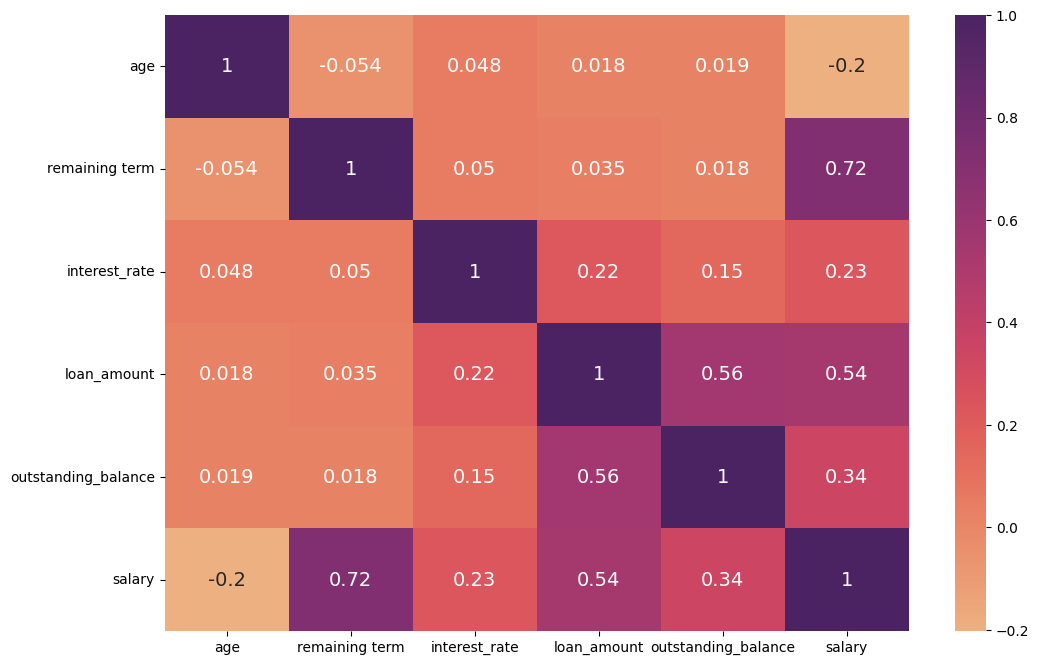

In [27]:
fig, ax =plt.subplots(figsize =(12,8))
df1= df[['age','remaining term','interest_rate','loan_amount','outstanding_balance','salary']]
corr_matrix = df1.corr()
corr_heatmap = sns.heatmap(corr_matrix, cmap = 'flare', annot = True , ax=ax , annot_kws ={'size':14})
plt.show()

>**Remaining Term and Salary (0.72)**: A strong positive correlation indicates that as the remaining term of a loan increases, the salary of the borrower also tends to increase. This could imply that individuals with higher salaries are more likely to take out longer-term loans, perhaps because they are more confident in their ability to repay over a longer period.

>**Loan Amount and Salary (0.54)**: A moderate positive correlation suggests that individuals with higher salaries tend to take out larger loans. This makes intuitive sense, as lenders often consider income when determining loan eligibility and maximum loan amounts.

>**Loan Amount and Outstanding Balance (0.56)**: A moderate positive correlation is expected here, as the outstanding balance of a loan is directly related to the initial loan amount. The higher the loan amount, the higher the outstanding balance is likely to be, especially in the early stages of repayment.

>"While some variables showed weak correlations (less than 0.5), the strongest relationships were observed between remaining term and salary (0.72), loan amount and salary (0.54), and loan amount and outstanding balance (0.56)."

> <b>Scatter showing correlations with higher figures.

> 1. Remaining term and salary (0.72).

Text(0.5, 1.0, 'Salary vs Remaining term')

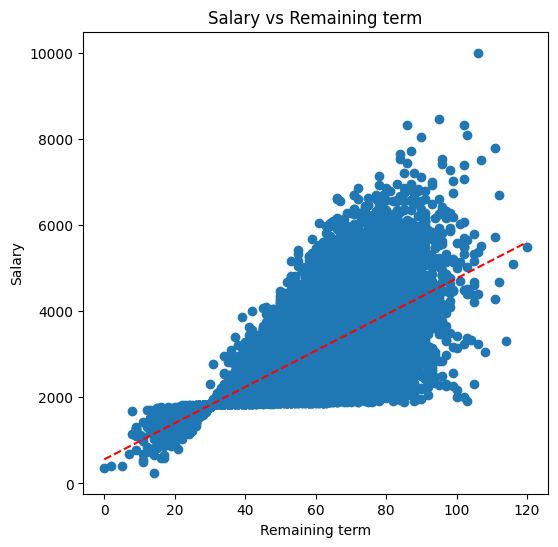

In [28]:
fig, ax = plt.subplots(figsize=(6, 6))
x=df["remaining term"]
y=df["salary"]
ax.scatter(x, y)
mean_x = np.mean(x)
mean_y =np.mean(y)
m = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x)) ** 2)
b = mean_y - m * mean_x
x_line = np.linspace(min(x), max(x), 100)
y_line = m*x_line + b
plt.plot(x_line,y_line, linestyle="--", color="red")
plt.xlabel("Remaining term")
plt.ylabel("Salary")
plt.title("Salary vs Remaining term")

>2. salary vs loan_amount scatter.

Text(0.5, 1.0, 'salary vs loan_amount')

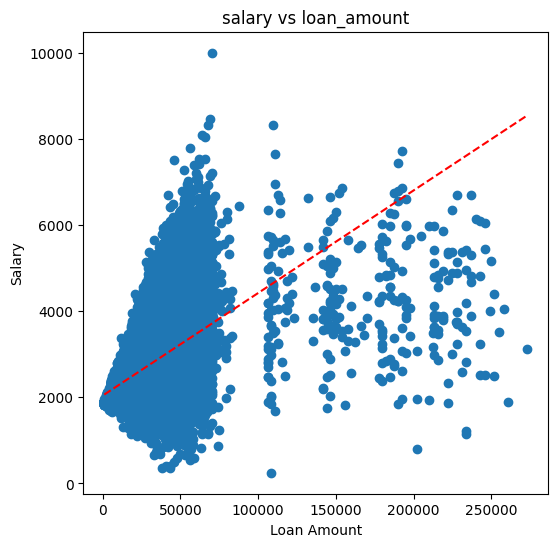

In [29]:
fig, ax = plt.subplots(figsize=(6, 6))
x=df["loan_amount"]
y=df["salary"]
ax.scatter(x, y)
mean_x = np.mean(x)
mean_y =np.mean(y)
m = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x)) ** 2)
b = mean_y - m * mean_x
x_line = np.linspace(min(x), max(x), 100)
y_line = m*x_line + b
plt.plot(x_line,y_line, linestyle="--", color="red")
plt.xlabel("Loan Amount")
plt.ylabel("Salary")
plt.title("salary vs loan_amount")

>3. outstanding_balance vs loan_amount

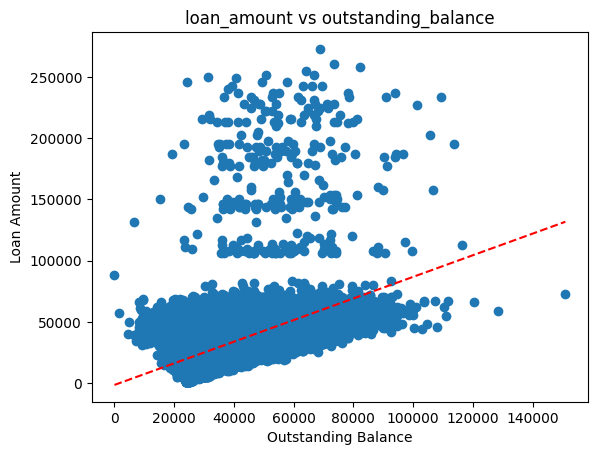

In [30]:
x=df["outstanding_balance"]
y=df["loan_amount"]
mean_x = np.mean(x)
mean_y =np.mean(y)
m = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x)) ** 2)
b = mean_y - m * mean_x
x_line = np.linspace(min(x), max(x), 100)  # Recalculate x_line
y_line = m*x_line + b
plt.plot(x_line,y_line, linestyle="--", color="red")  # Plot line first
plt.scatter(x, y)  # Plot scatter after
plt.xlabel("Outstanding Balance")
plt.ylabel("Loan Amount")
plt.title("loan_amount vs outstanding_balance")
plt.show()



---



>1. Loan Status.

In [31]:
data3 = pd.crosstab(
    index=df["number_of_defaults"],
    columns=df["Loan Status"],
    normalize=False
)

print("data type:", type(data3))
print("data shape:", data3.shape)
data3

data type: <class 'pandas.core.frame.DataFrame'>
data shape: (3, 2)


Loan Status,Defaulted,Did not default
number_of_defaults,,
0,7517,59641
1,4375,17112
2,2974,8381


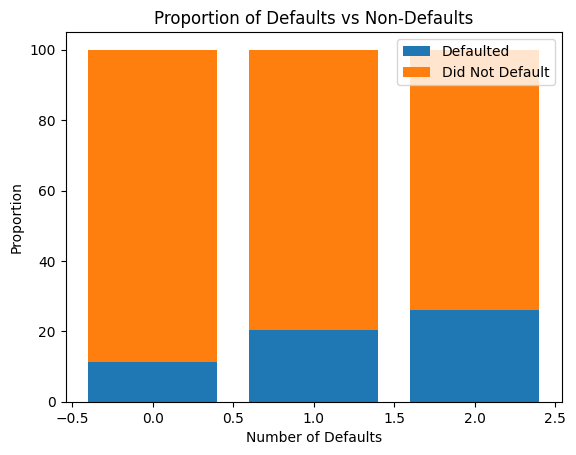

In [32]:
# Proportion of Defaults vs Non-Defaults
number_of_defaults = [0, 1, 2]
Defaulted = [7517, 4375, 2974]
Did_not_default = [59641, 17112, 8381]

total = [i + j for i, j in zip(Defaulted, Did_not_default)]
default_proportion = [i / j * 100 for i, j in zip(Defaulted, total)]
non_default_proportion = [i / j * 100 for i, j in zip(Did_not_default, total)]

plt.bar(number_of_defaults, default_proportion, label='Defaulted')
plt.bar(number_of_defaults, non_default_proportion, bottom=default_proportion, label='Did Not Default')

plt.xlabel("Number of Defaults")
plt.ylabel("Proportion")
plt.title("Proportion of Defaults vs Non-Defaults")
_ = plt.legend()

In [33]:
df['Loan Status'].describe()

count              100000
unique                  2
top       Did not default
freq                85134
Name: Loan Status, dtype: object



---



>2. Marital Status..

In [34]:
data2 = pd.crosstab(
    index=df["Loan Status"],
    columns=df["marital_status"],
    normalize=False
)

print("data type:", type(data2))
print("data shape:", data2.shape)
data2

data type: <class 'pandas.core.frame.DataFrame'>
data shape: (2, 4)


marital_status,,divorced,married,single
Loan Status,,,,
Defaulted,479,4749,6831,2807
Did not default,2648,21716,37879,22891


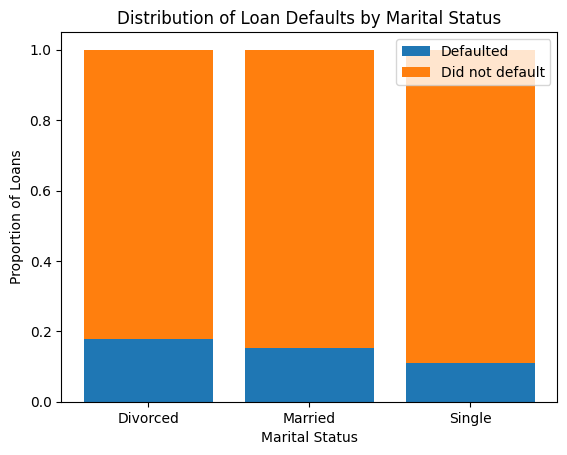

In [35]:
#Distribution of Loan Defaults by Marital Status


defaulted = [data2['divorced'][1] / (data2['divorced'][0] + data2['divorced'][1]),
             data2['married'][1] / (data2['married'][0] + data2['married'][1]),
             data2['single'][1] / (data2['single'][0] + data2['single'][1])]
not_defaulted = [1 - defaulted[0], 1 - defaulted[1], 1 - defaulted[2]]

labels = ['Divorced', 'Married', 'Single']

plt.bar(labels, not_defaulted, label='Defaulted')
plt.bar(labels, defaulted, bottom=not_defaulted, label='Did not default')

plt.xlabel('Marital Status')
plt.ylabel('Proportion of Loans')
plt.title('Distribution of Loan Defaults by Marital Status')
_ = plt.legend()


> Divorced has highest defaults with respect to the total of their pool.

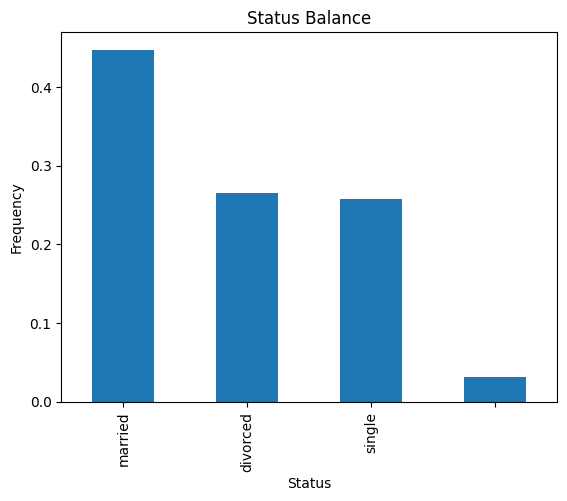

In [36]:
# Plot class balance
df["marital_status"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="Status",
    ylabel="Frequency",
    title="Status Balance"
);

> Married people are mostly the target market from the above showing a bigger chunk.

In [37]:
print(df['marital_status'].value_counts())

marital_status
married     44710
divorced    26465
single      25698
             3127
Name: count, dtype: int64


In [38]:
df['marital_status'].describe()

count      100000
unique          4
top       married
freq        44710
Name: marital_status, dtype: object

from the above we see other component that is anonymous later to be edited to other.



---



>3. Number of defaults

In [40]:
data = pd.crosstab(
    index=df["Loan Status"],
    columns=df["number_of_defaults"],
    normalize=False
)

print("data type:", type(data))
print("data shape:", data.shape)
data

data type: <class 'pandas.core.frame.DataFrame'>
data shape: (2, 3)


number_of_defaults,0,1,2
Loan Status,,,
Defaulted,7517,4375,2974
Did not default,59641,17112,8381


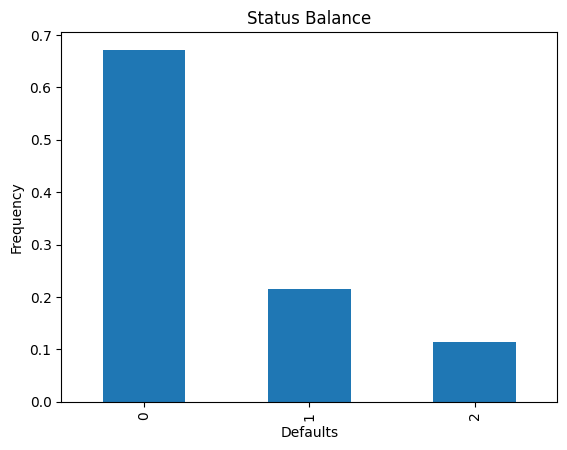

In [41]:
 # Plot class balance
df["number_of_defaults"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="Defaults",
    ylabel="Frequency",
    title="Status Balance"
);

>a good start, as majority of the clients did not default.

In [42]:
print(df['number_of_defaults'].value_counts())

number_of_defaults
0    67158
1    21487
2    11355
Name: count, dtype: int64


In [43]:
df['number_of_defaults'].describe()

count    100000.000000
mean          0.441970
std           0.688286
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           2.000000
Name: number_of_defaults, dtype: float64



---



>4. Locations.

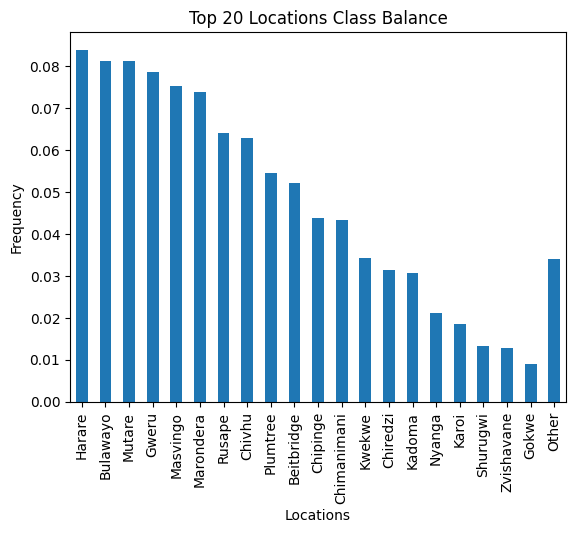

In [44]:
top_n = 20
top_locations = df["location"].value_counts(normalize=True).nlargest(top_n)
other_locations_freq = 1 - top_locations.sum()
top_locations['Other'] = other_locations_freq

top_locations.plot(kind='bar', xlabel='Locations', ylabel='Frequency', title=f'Top {top_n} Locations Class Balance')
plt.show()

>the loans are being taken mostly in Harare and decrease as the above, so there is need to explore other locations as well.

In [45]:
print(df['location'].value_counts().nlargest(top_n))

location
Harare         8338
Bulawayo       8078
Mutare         8062
Gweru          7803
Masvingo       7476
Marondera      7343
Rusape         6378
Chivhu         6257
Plumtree       5431
Beitbridge     5181
Chipinge       4358
Chimanimani    4296
Kwekwe         3401
Chiredzi       3123
Kadoma         3049
Nyanga         2099
Karoi          1850
Shurugwi       1322
Zvishavane     1276
Gokwe           901
Name: count, dtype: int64


In [46]:
df['location'].describe()

count      99405
unique       157
top       Harare
freq        8338
Name: location, dtype: object

In [47]:
unique_locations =df['location'].unique()

In [48]:
unique_locations.shape

(158,)

In [49]:
unique = pd.DataFrame(unique_locations, columns= ['locations'])

In [50]:
unique.head(5)

,locations
0,Beitbridge
1,Harare
2,Gweru
3,Rusape
4,Chipinge




---



>5. Jobs.

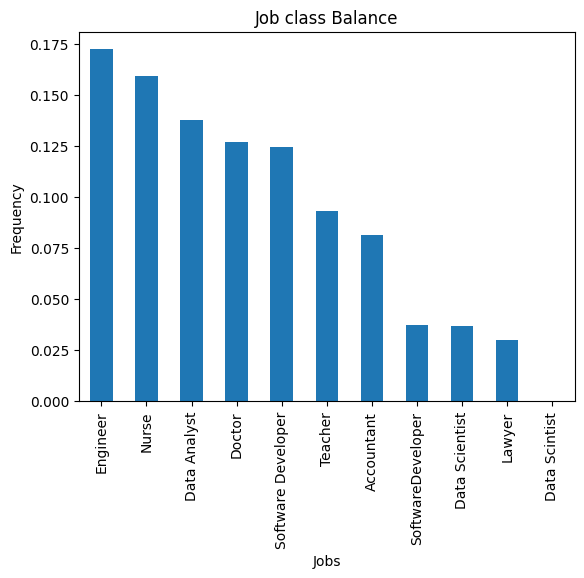

In [51]:
 # Plot class balance
df["job"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="Jobs",
    ylabel="Frequency",
    title="Job class Balance"
);

In [52]:
print(df['job'].value_counts())

job
Engineer              16524
Nurse                 15284
Data Analyst          13204
Doctor                12186
Software Developer    11932
Teacher                8950
Accountant             7802
SoftwareDeveloper      3564
Data Scientist         3521
Lawyer                 2862
Data Scintist            35
Name: count, dtype: int64


In [53]:
df['job'].describe()

count        95864
unique          11
top       Engineer
freq         16524
Name: job, dtype: object



---



>6. Loan Amount.

In [54]:
print(df['loan_amount'].value_counts())

loan_amount
5000.0      3639
33000.0     2877
32000.0     2839
35000.0     2811
29000.0     2804
            ... 
168000.0       1
240000.0       1
178000.0       1
250000.0       1
249000.0       1
Name: count, Length: 149, dtype: int64


In [55]:
df['loan_amount'].describe()

count    100000.000000
mean      31120.000000
std       15895.093631
min        1000.000000
25%       21000.000000
50%       31000.000000
75%       40000.000000
max      273000.000000
Name: loan_amount, dtype: float64

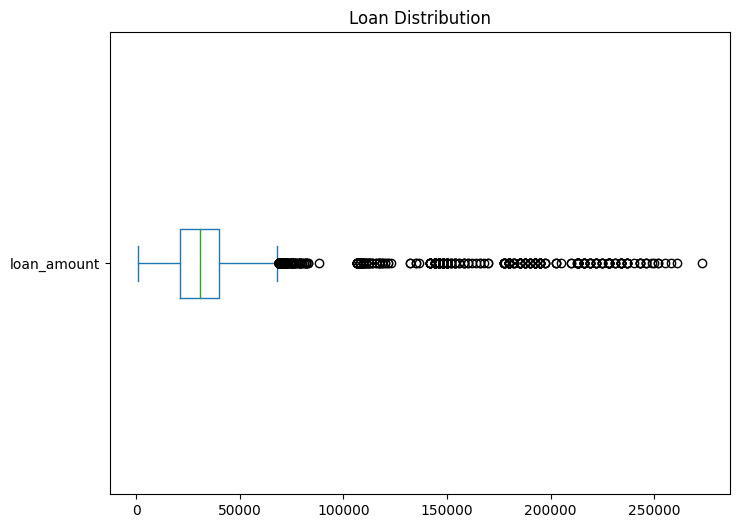

In [56]:
fig, ax =plt.subplots(figsize= (8,6))
df['loan_amount'].plot(kind= "box", vert= False, title='Loan Distribution', ax=ax)
plt.show()



---




>7. Interest rate.

In [57]:
print(df['interest_rate'].value_counts())

interest_rate
0.21    25514
0.22    21412
0.20    17647
0.23    10854
0.19     8743
0.24     4726
0.18     4259
0.17     2087
0.25     1964
0.16     1056
0.26      717
0.15      454
0.27      225
0.14      182
0.28       64
0.13       53
0.12       28
0.29        9
0.11        3
0.10        2
0.30        1
Name: count, dtype: int64


In [58]:
df['interest_rate'].describe()

count    100000.000000
mean          0.210435
std           0.018725
min           0.100000
25%           0.200000
50%           0.210000
75%           0.220000
max           0.300000
Name: interest_rate, dtype: float64

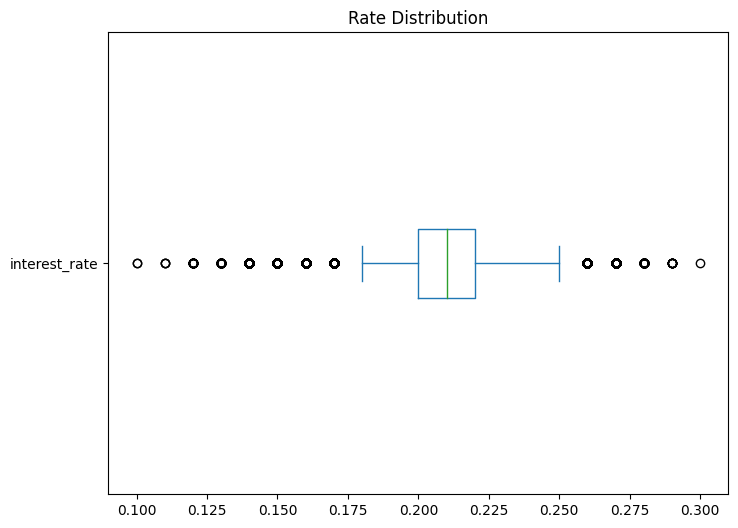

In [59]:
fig, ax =plt.subplots(figsize= (8,6))
df['interest_rate'].plot(kind= "box", vert= False, title='Rate Distribution', ax=ax)
plt.show()



---



>8. Age.